# Exploratory Data Analysis Project on Crimes in Austin, Texas
By Tejasvi Sadasivuni

![picture](https://i.imgur.com/f7tudKS.jpeg)

PC: https://i.imgur.com/f7tudKS.jpeg

# Introduction

Exploratory Data Analysis ([EDA](https://www.ibm.com/cloud/learn/exploratory-data-analysis)) is a method used by data scientists and other professionals to analyze and investigate datasets and summarize their main characteristics by employing data visualization methods. EDA also helps in the discovery of patterns, anomalies, hypothesis testing and checking assumptions.


In this project, at the time of its creation, crimes in Austin from 2003 to 2021 are analyzed. The code can pull newer data as it gets updated in the database.
  - The City of Austin, TX maintains a very user-friendly [website](https://data.austintexas.gov/) from where users can download data on a whole range of parameters about the city and do their own analysis to gain understanding or for presentation. 
  - The crime data for Austin is in this [website](https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu), and the csv file for it can be downloaded from there as well. 
  - The contents of this project are as follows: 
  1. Downloading the data
  2. Clean and save the data to Google Drive
  3. Access cleaned data from Google Drive
  4. Exploratory Data Analysis: 

    a. Analysis by time period (years, months, days of the week, time of day)

    b. Analysis by location

    c. Analysis by crime category

## 1. Downloading the data

We require several packages for this project. Some of those would be installed at the start and others such as folium would be installed when needed. 
We install the required packages for this project as follows:

In [ ]:
!pip install opendatasets pandas numpy plotly seaborn pyarrow matplotlib --upgrade --quiet
#!pip install pyyaml==5.4.1 --quiet

     |████████████████████████████████| 11.3 MB 20.7 MB/s 
     |████████████████████████████████| 15.7 MB 61 kB/s 
     |████████████████████████████████| 23.9 MB 14 kB/s 
     |████████████████████████████████| 25.5 MB 85 kB/s 
     |████████████████████████████████| 10.3 MB 75.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Next, we import those packages using conventional codenames such as 'pd' for pandas, np for numpy and so on. 

In [ ]:
import opendatasets as od
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The variable 'aus_crimes_url' is assigned to the url containing the data as follows:

In [ ]:
aus_crimes_url = 'https://data.austintexas.gov/api/views/fdj4-gpfu/rows.csv'

The opendatasets package (alias od) is used for downloading the dataset from the URL assigned to aus_crimes_url. Because this is a large dataset, it takes over 4 minutes to download. 
Further below in the project, there is a point where the cleaned data (stored in my google drive) is accessed for analysis.
Running the cells below downloads updated data from the aus_crimes_url. But running the cell which imports the file in my google drive contains crimes info up to the month of October 2021. 

In [ ]:
od.download(aus_crimes_url)

625303552it [15:40, 664747.40it/s] 


Once the download is complete, we can see the file: Crime_Reports.csv is the directory on the left. We then use pandas to read the csv and save it to a variable - aus_crimes_df.

In [ ]:
aus_crimes_df = pd.read_csv('Crime_Reports.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#Run this cell if there were attribute errors after the previous cell was run.
!pip install -U pandas-profiling --quiet

## 2. Clean the data and save to Google Drive

We pass the dataframe with the methods mentioned below to get a better picture of the kind of data we are dealing with:

- The '.info()' method is passed to the dataframe to check the nature of information contained in each column of the dataset. 

- The '.describe()' method is used to get statistical information about any numerical columns of the dataset. 

- The '.sample()' method is used to check a few rows of the dataset and we can  get an idea of what the dataset would look like. 

- The '.shape' method gives us the number of rows and columns of the dataset. 

In [ ]:
aus_crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2377826 entries, 0 to 2377825
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

In [ ]:
aus_crimes_df.describe()

,Incident Number,Highest Offense Code,Occurred Time,Report Time,Zip Code,Council District,Census Tract,X-coordinate,Y-coordinate,Latitude,Longitude
count,2.377826e+06,2.377826e+06,2.377741e+06,2.377825e+06,2.362767e+06,2.329529e+06,1.857393e+06,2.366968e+06,2.366968e+06,2.337158e+06,2.337158e+06
mean,6.552455e+10,1.768351e+03,1.325154e+03,1.325571e+03,7.873010e+04,4.948942e+00,1.894832e+02,3.077775e+06,3.077775e+06,3.028904e+01,-9.773371e+01
std,3.062170e+11,1.210852e+03,7.198404e+02,6.664258e+02,4.040869e+02,2.848258e+00,4.912112e+03,3.660810e+05,3.660810e+05,1.803301e-01,3.103769e-01
min,2.003500e+04,1.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-3.262185e+07,-3.262185e+07,1.185700e-04,-9.918164e+01
25%,2.005232e+10,6.010000e+02,8.070000e+02,9.040000e+02,7.870500e+04,3.000000e+00,1.312000e+01,3.108619e+06,3.108619e+06,3.023259e+01,-9.775874e+01
50%,2.010171e+10,1.400000e+03,1.430000e+03,1.407000e+03,7.874100e+04,4.000000e+00,1.839000e+01,3.117200e+06,3.117200e+06,3.027384e+01,-9.773245e+01
75%,2.015501e+10,2.721000e+03,1.932000e+03,1.857000e+03,7.875200e+04,7.000000e+00,2.318000e+01,3.126433e+06,3.126433e+06,3.034800e+01,-9.770251e+01
max,2.021213e+12,8.905000e+03,2.400000e+03,2.359000e+03,7.875900e+04,1.000000e+01,9.601000e+05,3.889524e+07,3.889524e+07,4.216665e+01,-1.320800e-04


In [ ]:
aus_crimes_df.sample(5)

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
1652629,20045046273,BURGLARY OF VEHICLE,601,N,09/24/2004 03:00:00 PM,09/24/2004,1500.0,09/24/2004 08:34:00 PM,09/24/2004,2034.0,PARKING LOTS / GARAGE,9101 RESEARCH BLVD SVRD NB,78758.0,7.0,AD,1,217.0,18.49,NaN,09/28/2004,23F,Theft,3117855.0,3117855.0,30.374930,-97.728701,"(30.37492967, -97.72870061)"
1908528,20121450858,POSS DANG DRUG,1810,N,05/24/2012 02:35:00 PM,05/24/2012,1435.0,05/24/2012 02:35:00 PM,05/24/2012,1435.0,STREETS / HWY / ROAD / ALLEY,S 1ST ST / W SLAUGHTER LN,78748.0,5.0,FR,2,542.0,24.37,C,06/01/2012,NaN,NaN,3097193.0,3097193.0,30.172455,-97.799561,"(30.17245517, -97.79956075)"
2374017,20081410110,VIOL CITY ORDINANCE - OTHER,3299,N,05/20/2008 01:00:00 AM,05/20/2008,100.0,05/20/2008 01:02:00 AM,05/20/2008,102.0,STREETS / HWY / ROAD / ALLEY,E 6TH ST / TRINITY ST,78701.0,9.0,GE,2,382,11.00,C,05/22/2008,NaN,NaN,3115415.0,3115415.0,30.267068,-97.739342,"(30.26706768, -97.73934174)"
1649779,20093131483,CUSTODY ARREST TRAFFIC WARR,3722,N,11/09/2009 05:37:00 PM,11/09/2009,1737.0,11/09/2009 05:37:00 PM,11/09/2009,1737.0,STREETS / HWY / ROAD / ALLEY,2700 BLOCK E 7TH ST,78702.0,3.0,CH,2,422.0,9.00,C,11/12/2009,NaN,NaN,3124328.0,3124328.0,30.260836,-97.711270,"(30.26083607, -97.71127013)"
2311968,20163410032,POSSESSION OF MARIJUANA,1803,N,12/06/2016 01:16:00 AM,12/06/2016,116.0,12/06/2016 05:23:00 AM,12/06/2016,523.0,STREETS / HWY / ROAD / ALLEY,W 5TH ST / LAVACA ST,78701.0,9.0,GE,1,380.0,11.00,C,12/06/2016,NaN,NaN,3113449.0,3113449.0,30.267796,-97.745551,"(30.26779557, -97.74555148)"


Looking at the sample data, we have some interesting columns to work with - such as Highest Offense Description, Latitude and Longitude, Category Description and so on. 

In [ ]:
aus_crimes_df.shape

(2377826, 27)

So we have 27 columns and over 2 million rows of data on the website. For the sake of this analysis, the columns which are not very relevant are dropped. 

In [ ]:
# drop unnecessary columns
aus_crimes_df = aus_crimes_df.drop(columns=['Incident Number','Council District', 'PRA', 'Census Tract', 'Clearance Status', 
                                            'Clearance Date', 'UCR Category', 'Highest Offense Code']).reset_index()

In [ ]:
aus_crimes_df.shape

(2377826, 20)

Because we are dealing with over 2 million rows of data, it would be helpful to see which columns have a significant percentage of columns with missing data.

In [ ]:
# To check what % of data from each column is missing
missing_percentages = aus_crimes_df.isna().sum().sort_values(ascending = False)/len(aus_crimes_df)

In [ ]:
print('Column Name            Percentage of rows with missing data\n');
print(missing_percentages*100);

Column Name            Percentage of rows with missing data

Category Description           65.717424
Location                        1.710302
Longitude                       1.710302
Latitude                        1.710302
Location Type                   0.888080
Zip Code                        0.633310
Y-coordinate                    0.456636
X-coordinate                    0.456636
APD District                    0.425893
APD Sector                      0.405244
Occurred Date Time              0.006981
Occurred Time                   0.003575
Address                         0.000505
Report Time                     0.000042
Report Date Time                0.000042
Highest Offense Description     0.000000
Report Date                     0.000000
Occurred Date                   0.000000
Family Violence                 0.000000
index                           0.000000
dtype: float64


We can see that about 70% of the rows have no values listed in the 'Category Description' column. Let's look at the nature of info in the category description column. Let's look at the 'Highest Offence Description' column. Perhaps that could be the way to go about doing our analysis.

Let's look at the highest offence description column:

In [ ]:
len(aus_crimes_df['Highest Offense Description'].unique())

431

There are over 400 unique items in the 'Highest Offense Description' column. A good amount of legal knowledge is required to broadly classify all of those crimes into various categories. Also, from the dataset, many of the unique items in the 'Highest Offence Description' column do not have any data under the 'Category Description' column. 

Let's have a look at the 'Category Description' column. 

In [ ]:
aus_crimes_df['Category Description'].unique()

array([nan, 'Aggravated Assault', 'Theft', 'Burglary', 'Rape',
       'Auto Theft', 'Murder', 'Robbery'], dtype=object)

For the sake of simplicity, the 'Category Description' column will be used to classify the crimes. Let's see what we are left with if the rows containing 'NA' for 'Category Description' are dropped.

In [ ]:
aus_crimes_df = aus_crimes_df.dropna(subset=['Category Description'])
len(aus_crimes_df['Category Description'])

815180

We are left with over 800k rows of data, which is significant for the scope of this project. More importantly, we can save this data into various formats such as feather to make it quicker to save and read from. 

Location data will also be used for plotting crimes on the Austin map as part of this project. Let's look at how what percentage of rows are missing location data.

In [ ]:
print("The % of rows without location data is: {}%".format(((aus_crimes_df['Location'].isna().sum())*100/len(aus_crimes_df)).round(2)))

The % of rows without location data is: 2.03%


Let's check at the number of rows left after dropping the missing location rows

In [ ]:
len_df = len(aus_crimes_df) - aus_crimes_df['Location'].isna().sum()
len_df

798597

In [ ]:
print('We are left with about {} rows of data to explore which is sufficient for EDA.'.format(len_df))

We are left with about 798597 rows of data to explore which is sufficient for EDA.


Let's confirm the shape of the dataset:

In [ ]:
aus_crimes_df = aus_crimes_df.dropna(subset=['Location']).reset_index()
aus_crimes_df.shape

(798597, 21)

In [ ]:
#Check the dataframe:
aus_crimes_df.sample(5)

,level_0,index,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,APD Sector,APD District,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
663364,1997974,1997974,AUTO THEFT,N,08/01/2012 10:30:00 PM,08/01/2012,2230.0,08/01/2012 10:30:00 PM,08/01/2012,2230.0,PARKING LOTS / GARAGE,5812 N IH 35 SVRD SB,78751.0,ID,6,Auto Theft,3124866.0,3124866.0,30.319832,-97.707961,"(30.3198323, -97.70796135)"
772108,2303518,2303518,THEFT,N,12/20/2004 08:30:00 PM,12/20/2004,2030.0,12/21/2004 05:43:00 PM,12/21/2004,1743.0,PARKING LOTS / GARAGE,4610 S I 35 SB SVC RD,78745.0,FR,2,Theft,3110647.0,3110647.0,30.209583,-97.755984,"(30.20958349, -97.7559837)"
625501,1904132,1904132,THEFT BY SHOPLIFTING,N,07/28/2018 08:36:00 PM,07/28/2018,2036.0,07/29/2018 04:32:00 PM,07/29/2018,1632.0,ABANDONED/CONDEMNED STRUCTURE,9607 RESEARCH BLVD SVRD NB,78759.0,AD,1,Theft,3113784.0,3113784.0,30.388553,-97.741248,"(30.3885533, -97.74124779)"
341402,1101326,1101326,THEFT OF LICENSE PLATE,N,08/21/2011 11:00:00 AM,08/21/2011,1100.0,09/21/2011 11:23:00 AM,09/21/2011,1123.0,RESIDENCE / HOME,2914 AFTONSHIRE WAY,78748.0,FR,1,Theft,3085065.0,3085065.0,30.181046,-97.837728,"(30.18104595, -97.83772812)"
65042,212778,212778,THEFT,N,05/05/2006 01:00:00 AM,05/05/2006,100.0,05/07/2006 09:56:00 AM,05/07/2006,956.0,STREETS / HWY / ROAD / ALLEY,CAMERON LOOP / DAVIS LN,78745.0,FR,1,Theft,3085017.0,3085017.0,30.192987,-97.837572,"(30.1929873, -97.83757165)"


In [ ]:
#It appears that there are 2 index columns at the beginning for the df. Let's drop them and save

In [ ]:
aus_crimes_df = aus_crimes_df.drop(columns=['level_0'])
aus_crimes_df.sample(5)

,index,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,APD Sector,APD District,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
352283,1134019,BURGLARY OF VEHICLE,N,03/19/2014 02:00:00 AM,03/19/2014,200.0,03/19/2014 10:43:00 AM,03/19/2014,1043.0,RESIDENCE / HOME,11701 BAYOU BND,78759.0,AD,7,Theft,3105996.0,3105996.0,30.426402,-97.764947,"(30.42640158, -97.76494686)"
319399,1035471,THEFT,N,07/23/2008 05:00:00 PM,07/23/2008,1700.0,07/23/2008 08:36:00 PM,07/23/2008,2036.0,DEPARTMENT / DISCOUNT STORE,2901 S CAPITAL OF TEXAS HWY NB,78746.0,DA,5,Theft,3094135.0,3094135.0,30.257886,-97.807007,"(30.25788603, -97.80700704)"
670725,2018826,THEFT,N,02/07/2009 12:00:00 PM,02/07/2009,1200.0,02/16/2009 11:31:00 AM,02/16/2009,1131.0,RESIDENCE / HOME,1647 RUTLAND DR,78758.0,ED,2,Theft,3122927.0,3122927.0,30.373786,-97.712643,"(30.37378575, -97.71264307)"
320997,1040363,THEFT,N,04/25/2019 07:15:00 PM,04/25/2019,1915.0,04/26/2019 10:22:00 AM,04/26/2019,1022.0,RESIDENCE / HOME,3622 MANCHACA RD,78704.0,DA,4,Theft,3101540.0,3101540.0,30.237910,-97.784074,"(30.23791009, -97.78407428)"
22190,71555,BURGLARY OF VEHICLE,N,07/17/2015 08:00:00 PM,07/17/2015,2000.0,07/18/2015 12:16:00 PM,07/18/2015,1216.0,RESIDENCE / HOME,1703 E 17TH ST,78702.0,CH,3,Theft,3120696.0,3120696.0,30.277344,-97.722331,"(30.27734402, -97.72233098)"


In [ ]:
aus_crimes_df = aus_crimes_df.drop(columns=['index'])
aus_crimes_df.sample(5)

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,APD Sector,APD District,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
414000,AUTO THEFT,N,05/03/2007 12:10:00 AM,05/03/2007,10.0,05/03/2007 11:07:00 AM,05/03/2007,1107.0,HOTEL / MOTEL / ETC.,9420 N IH 35 SVRD SB,78753.0,ED,1,Auto Theft,3130704.0,3130704.0,30.359794,-97.688358,"(30.35979391, -97.688358)"
453173,BURGLARY OF VEHICLE,N,05/24/2017 02:50:00 PM,05/24/2017,1450.0,05/24/2017 04:36:00 PM,05/24/2017,1636.0,RESTAURANTS,10201 JOLLYVILLE RD,78759.0,AD,7,Theft,3111101.0,3111101.0,30.396243,-97.749553,"(30.39624305, -97.74955349)"
86676,BURGLARY OF VEHICLE,N,08/03/2004 11:00:00 AM,08/03/2004,1100.0,08/03/2004 05:39:00 PM,08/03/2004,1739.0,STREETS / HWY / ROAD / ALLEY,700 E RIVERSIDE DR,78704.0,HE,1,Theft,3115094.0,3115094.0,30.251478,-97.740777,"(30.25147759, -97.74077748)"
612029,ROBBERY BY ASSAULT,N,05/22/2011 02:35:00 AM,05/22/2011,235.0,05/22/2011 02:43:00 AM,05/22/2011,243.0,STREETS / HWY / ROAD / ALLEY,8001 RESEARCH BLVD SVRD NB,78758.0,ED,2,Robbery,3123212.0,3123212.0,30.351147,-97.712354,"(30.35114708, -97.71235432)"
694331,THEFT,N,04/27/2007 04:00:00 PM,04/27/2007,1600.0,04/28/2007 07:35:00 PM,04/28/2007,1935.0,SCHOOLS / COLLEGES,4103 W SLAUGHTER LN,78749.0,DA,8,Theft,3078801.0,3078801.0,30.188913,-97.857356,"(30.18891326, -97.85735586)"


Let's save this dataframe in feather format to save time when pulling the dataframe next time. 

In [ ]:
!pip install pyarrow --quiet
import pyarrow.feather as feather

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
aus_crimes_df.to_feather('/content/drive/MyDrive/Colab Notebooks/aus_crimes.feather')

In [ ]:
# The code below this line will be needed to run if the feather file upload did not happen right the first time. 
# drive.mount("/content/drive", force_remount=True)

## 3. Access cleaned data from Google Drive
- In this section, I have added cells to reinstall and import all the packages. 
- This is because, over the process of making this project, I would most often read the feather file saved in my Google Drive in order to save time by avoiding downloading a fresh csv from the Austin city's website. 

In [ ]:
!pip install opendatasets pandas numpy plotly seaborn pyarrow folium numpy --upgrade --quiet
!pip install pyyaml==5.4.1 --quiet

In [ ]:
#Run the line below if there were attribute errors after the previous cell was run.
!pip install -U pandas-profiling --quiet

In [ ]:
import yaml
yaml.safe_load('stream')
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import datetime
import seaborn as sns
import folium
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%%time
# Read the feather file from google drive
aus_crimes_df = pd.read_feather('/content/drive/MyDrive/Colab Notebooks/aus_crimes.feather')

CPU times: user 1.1 s, sys: 643 ms, total: 1.75 s
Wall time: 1.71 s


Let's look at the columns of the dataframe to make sure the data isnt affected with the transfer to and from Google Drive 

In [ ]:
aus_crimes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798597 entries, 0 to 798596
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Highest Offense Description  798597 non-null  object 
 1   Family Violence              798597 non-null  object 
 2   Occurred Date Time           798531 non-null  object 
 3   Occurred Date                798597 non-null  object 
 4   Occurred Time                798589 non-null  float64
 5   Report Date Time             798597 non-null  object 
 6   Report Date                  798597 non-null  object 
 7   Report Time                  798597 non-null  float64
 8   Location Type                796831 non-null  object 
 9   Address                      798597 non-null  object 
 10  Zip Code                     797905 non-null  float64
 11  APD Sector                   798592 non-null  object 
 12  APD District                 798589 non-null  object 
 13 

We can see that most of the columns are object types and a few such as Occurred Time, Report Time, Zip Code and the location Coordinates are in float data types. The columns containing date and time info will be converted into datetime datatypes in the cells below. 

## 4. Exploratory Analysis and Visualization

### 4.1 Analysis based on period of occurrence

There are multiple columns containing date and time info in the dataset, and those are in float64 format. These will need to be converted to datetime objects for better usability. Let's also add a columns 'Day of Week' to determine the day for each of the occurred dates. 

In [ ]:
aus_crimes_df['Occurred Date'] = pd.to_datetime(aus_crimes_df['Occurred Date'])
aus_crimes_df['Occurred Year'] = aus_crimes_df['Occurred Date'].dt.year
aus_crimes_df['Occurred Month'] = aus_crimes_df['Occurred Date'].dt.month
aus_crimes_df['Day of Week'] = aus_crimes_df['Occurred Date'].dt.day_name()
aus_crimes_df['Report Date'] = pd.to_datetime(aus_crimes_df['Report Date'])
aus_crimes_df['Report Date Time'] = pd.to_datetime(aus_crimes_df['Report Date Time'])

#### 4.1.1 Analyzing crimes by year in Austin:

In [ ]:
avg_cr_yr = np.mean(aus_crimes_df['Occurred Year'].value_counts())
print('The average number of crimes per year in Austin, TX is {}'.format(round(avg_cr_yr)))

The average number of crimes per year in Austin, TX is 42031


In [ ]:
#Let's look at how many years are specified in the dataset:
print('This dataset has {} years of data.'.format(len(aus_crimes_df['Occurred Year'].unique())))

This dataset has 19 years of data.


In [ ]:
years = [aus_crimes_df['Occurred Year'].unique()]
np.sort(years)

array([[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
        2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]])

We have data from 2003 to 2021 in this dataset. 

Let's look at the count of crimes by year

In [ ]:
# year to year trend:
fig = px.bar(aus_crimes_df, 
             x = aus_crimes_df['Occurred Year'].unique(),
             y = aus_crimes_df['Occurred Year'].value_counts())
fig.update_layout(
    xaxis_title = 'Year',
    yaxis_title = 'Count of crimes',
    title = 'Total crimes by year in Austin (2003 - 2021)'
    )

fig.show()

#### 4.1.2 Analyzing Crimes by month of year in Austin

In [ ]:
#Let's check the average number of crimes every month in Austin:
#First extract the month-year combination from 'Occurred Date' column.
aus_crimes_df['Month_Year'] = pd.to_datetime(aus_crimes_df['Occurred Date']).dt.to_period('M')
aus_crimes_df.head(3)

,Highest Offense Description,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,APD Sector,APD District,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location,Occurred Year,Occurred Month,Day of Week,Month_Year
0,DEADLY CONDUCT,N,06/04/2019 03:12:00 AM,2019-06-04,312.0,2019-06-04 03:16:00,2019-06-04,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,ED,1,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)",2019,6,Tuesday,2019-06
1,THEFT OF LICENSE PLATE,N,06/03/2019 03:00:00 PM,2019-06-03,1500.0,2019-06-04 15:22:00,2019-06-04,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,FR,4,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)",2019,6,Monday,2019-06
2,BURGLARY OF RESIDENCE,N,06/14/2019 12:00:00 PM,2019-06-14,1200.0,2019-06-16 22:00:00,2019-06-16,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,BA,8,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)",2019,6,Friday,2019-06


In [ ]:
#Calculate the average crime per month for all months since 2003 and see if we find somehting interesting
avg_cr_mo = np.mean(aus_crimes_df['Month_Year'].value_counts())
print('The average number of crimes per year in Austin, TX is {}'.format(round(avg_cr_mo)))

The average number of crimes per year in Austin, TX is 3518


Let's look at the average monthly crime rate for all the years 

In [ ]:
#Average monthly trend:
fig = px.bar(aus_crimes_df, 
             x = aus_crimes_df['Occurred Month'].unique(),
             y = aus_crimes_df['Occurred Month'].value_counts()/len(aus_crimes_df['Occurred Year'].unique()))
fig.update_layout(
    xaxis_title = 'Month',
    yaxis_title = 'Average number of crimes',
    title = 'Average monthly crimes in Austin (for years 2003 - 2021)'
)
fig.show()

We can see that the average number of crimes in October is the lowest {probably because of the ghosts of Halloween 8-)} and June is the highest. Please note that the average number of crimes for November and December do not take into account the year 2021 - as of when this code was written. Let's calculate the average for November and December as of 2020: 

In [ ]:
#Checking the average number of crimes per month:
av_cr_mo = (aus_crimes_df['Occurred Month'].value_counts()/len(aus_crimes_df['Occurred Year'].unique())).round()
av_cr_mo.sort_values

<bound method Series.sort_values of 10    3709.0
7     3695.0
8     3662.0
5     3655.0
9     3544.0
6     3541.0
3     3524.0
4     3474.0
1     3453.0
12    3435.0
11    3319.0
2     3020.0
Name: Occurred Month, dtype: float64>

In [ ]:
#Number of years in dataframe:
len(aus_crimes_df['Occurred Year'].unique())

19

In [ ]:
av_cr_mo[11] = (av_cr_mo[11]*19/18).round()
av_cr_mo[12] = (av_cr_mo[11]*19/18).round()
av_cr_mo.sort_values

<bound method Series.sort_values of 10    3709.0
7     3695.0
8     3662.0
5     3655.0
9     3544.0
6     3541.0
3     3524.0
4     3474.0
1     3453.0
12    3698.0
11    3503.0
2     3020.0
Name: Occurred Month, dtype: float64>

In [ ]:
print('The average number of crimes for November and December are: {} and {}'.format(av_cr_mo[11], av_cr_mo[12]))
print('The average monthly crimes across all months is: {}'.format(round(avg_cr_mo)))

The average number of crimes for November and December are: 3503.0 and 3698.0
The average monthly crimes across all months is: 3518


#### 4.1.3 Analyzing crimes by day of week in Austin

In [ ]:
#average number of crimes per day in Austin, TX (for 2003-2021, assuming 52 weeks a year)
fig = px.histogram(aus_crimes_df, x = aus_crimes_df['Day of Week'].unique(),
             y = aus_crimes_df['Day of Week'].value_counts()/(19*52))
fig.update_layout(xaxis_title = 'Day of Week', 
                  yaxis_title = 'Count of crimes',
                  title = 'Average number of crimes per day in Austin, TX',
                  title_x = 0.5)
fig.show()

It looks like Tuesdays average the highest and Sundays average the lowest in crime rate. 

#### 4.1.4 Analyzing crimes based on time of day in Austin

In [ ]:
# aus_crimes_df['Occurred Time'] = pd.to_datetime(aus_crimes_df['Occurred Time'],format='%H%M')
aus_crimes_df['Occurred Time'].sample(5)

265627    1539.0
38585        0.0
140786    1935.0
75895     2200.0
531616    1400.0
Name: Occurred Time, dtype: float64

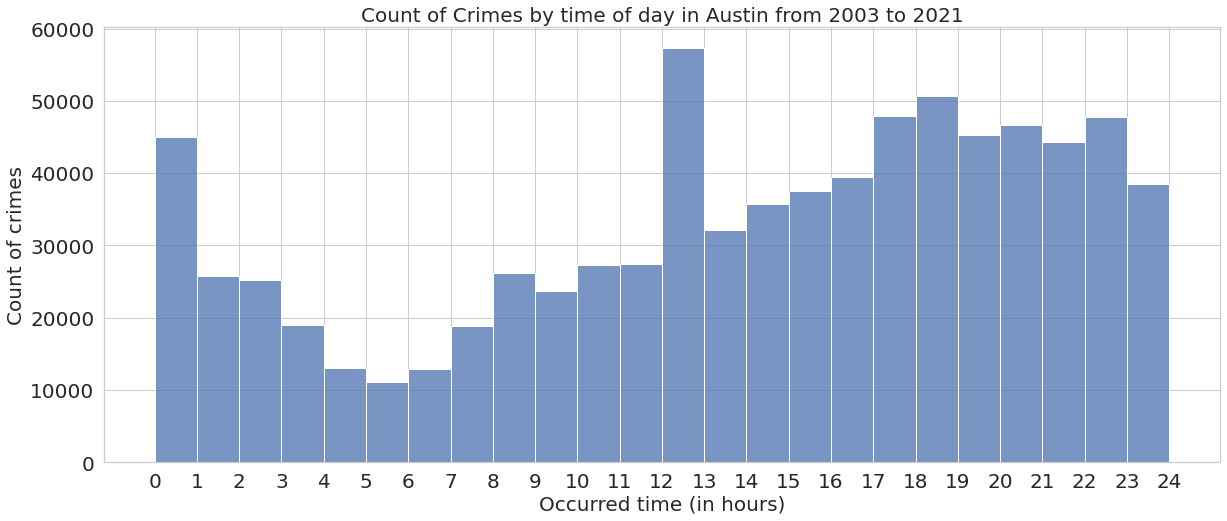

In [ ]:
plt.figure(figsize=(20, 8))
chart = sns.histplot(aus_crimes_df['Occurred Time']//100, bins=24)
plt.xticks(range(0, 25))
plt.xlabel('Occurred time (in hours)')
plt.ylabel('Count of crimes')
sns.set_theme(style='whitegrid')
plt.title('Crimes by time of day in Austin')

ay = plt.subplot(chart, xlabel='Occurred time (in hours)', ylabel='Count of crimes', title='')
ay.set_title('Count of Crimes by time of day in Austin from 2003 to 2021')
plt.xlabel('Occurred time (in hours)')

for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(20)


It appears that crime rates are the lowest at about 5am and go up from there - till midnight, and then start to fall back to 5am levels. There is a spike however at about 12pm.

### 4.2 Analyzing crimes based on location in Austin

#### 4.2.1 Analysis based on zipcode

In [ ]:
#Let's clean the data some more. Let's create a new DF: aus_crimes_df_2 qhich is a copy of aus_crimes_dr without the rows where the Zip Code is 0.

aus_crimes_df_2 = aus_crimes_df[aus_crimes_df['Zip Code']!=0].reset_index()

Let's look at the top 10 zipcodes for overall crime counts in Austin

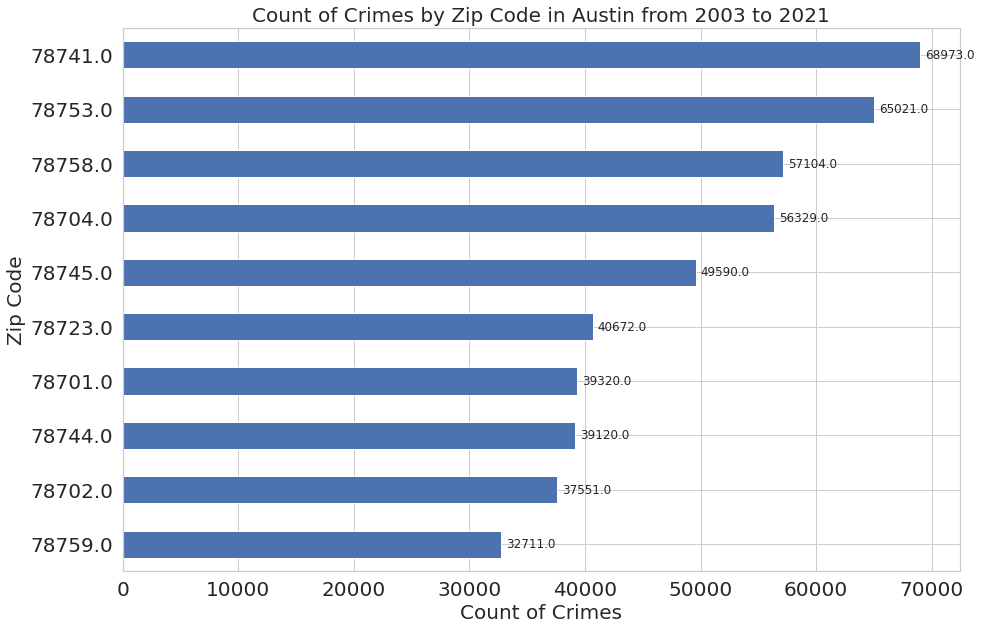

In [ ]:
table = pd.pivot_table(aus_crimes_df_2, values='index',index=['Zip Code'],aggfunc=len)
chart=(table.sort_values('index', ascending=True)).iloc[-10:].plot(kind='barh', figsize=(15, 10))
# plt.xlabel('Count of crimes')

ay = plt.subplot(chart, xlabel='Count of crimes', ylabel='Zip Code', title='')
ay.set_title('Count of Crimes by Zip Code in Austin from 2003 to 2021')
plt.xlabel('Count of Crimes')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(20)


rects=chart.patches
for rect in rects:
  # Get X and Y placement of label from rect.
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label. Change to your liking.
    space = 5
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: Place label left of bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label at right
        ha = 'right'

    # Use X value as label and format number with one decimal place
    label = "{:.1f}".format(x_value)

     # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at end of the bar
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords="offset points", # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha)                      # Horizontally align label differently for
                                    # positive and negative values.
#source: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart





It looks like zip 78741 has the highest number of crimes, and we will need to dig into the reasons why in a future task.

#### 4.2.2 Mapping the Data: 

In [ ]:
#Check if any rows have NA for the Location  or Latitude or Longitude column:
print('Missing rows for Location column: {}'.format(aus_crimes_df['Location'].isna().sum()))
print('Missing rows for Latitude column: {}'.format(aus_crimes_df['Latitude'].isna().sum()))
print('Missing rows for Longitude column: {}'.format(aus_crimes_df['Longitude'].isna().sum()))

Missing rows for Location column: 0
Missing rows for Latitude column: 0
Missing rows for Longitude column: 0


In [ ]:
#Install folium package:
!pip install folium --upgrade --quiet
import folium
from folium import plugins

In [ ]:
# Year and Zip code interactive tool:
print('Available zip codes to search are:'+ str(np.sort(aus_crimes_df['Zip Code'].unique())))
zipcode_input = int(input('Please enter a zip code from the list: '))
year_input = int(input('Please enter the year you are interested in (2003-2021): '))

filtered_df = aus_crimes_df_2[(aus_crimes_df_2['Zip Code'] == zipcode_input) & (aus_crimes_df_2['Occurred Year'] ==year_input)]
f = folium.Figure(width=1000, height=500)
m = folium.Map(location=[30.265291020874546, -97.74944791477134], zoom_start=11).add_to(f)
for i in filtered_df.index[:20]:
  if filtered_df['Category Description'][i] == 'Murder':
    folium.Marker(location=[filtered_df['Latitude'][i], filtered_df['Longitude'][i]], 
                  tooltip=[filtered_df['Category Description'][i], filtered_df['Zip Code'][i]],
                  popup = filtered_df['Occurred Date'][i],
                  tiles="Stamen Toner",
                  icon=folium.Icon(color="red")).add_to(m)
    
  elif filtered_df['Category Description'][i] == 'Aggravated Assault':
    folium.Marker(location=[filtered_df['Latitude'][i], filtered_df['Longitude'][i]], 
                  tooltip=[filtered_df['Category Description'][i], filtered_df['Zip Code'][i]],
                  popup = filtered_df['Occurred Date'][i],
                  tiles="Cartodbpositron",
                  icon=folium.Icon(color="orange")).add_to(m)
  else: folium.Marker(location=[filtered_df['Latitude'][i], filtered_df['Longitude'][i]], 
                      tooltip=[filtered_df['Category Description'][i], filtered_df['Zip Code'][i]],
                      popup = filtered_df['Occurred Date'][i],
                      tiles="Stamen Toner",
                      icon=folium.Icon(color="blue")).add_to(m)

#bounds of map: https://stackoverflow.com/questions/58162200/pre-determine-optimal-level-of-zoom-in-folium
sw = filtered_df[['Latitude', 'Longitude']].min().values.tolist()
ne = filtered_df[['Latitude', 'Longitude']].max().values.tolist()

m.fit_bounds([sw, ne]) 
m

Available zip codes to search are:[    0. 76574. 78610. 78612. 78613. 78615. 78617. 78620. 78621. 78634.
 78641. 78645. 78652. 78653. 78660. 78664. 78669. 78681. 78701. 78702.
 78703. 78704. 78705. 78712. 78713. 78717. 78719. 78721. 78722. 78723.
 78724. 78725. 78726. 78727. 78728. 78729. 78730. 78731. 78732. 78733.
 78734. 78735. 78736. 78737. 78738. 78739. 78741. 78742. 78744. 78745.
 78746. 78747. 78748. 78749. 78750. 78751. 78752. 78753. 78754. 78756.
 78757. 78758. 78759.    nan]
Please enter a zip code from the list: 78754
Please enter the year you are interested in (2003-2021): 2018


                                                       Crimes sample data for the zip code and year queried





Let's check the most crime in Austin based on geographical location using a heatmap: 

In [ ]:
from folium import plugins
from folium.plugins import HeatMap
import branca.colormap as cm
steps=40
colormap = cm.LinearColormap(colors=['blue','lightblue','green','yellow', 'orange'], vmin=0,vmax=1)
# colormap = branca.colormap.linear.YlBu_09.scale(0, 1).to_step(steps)
f = folium.Figure(width=1000, height=500)
m = folium.Map(location=[30.265, -97.75], zoom_start=10, tooltip='Zip Code').add_to(f)
HeatMap(aus_crimes_df[['Latitude', 'Longitude']], max_opacity=0.1, blur=40).add_to(m)
colormap.add_to(m)
m
#https://stackoverflow.com/questions/47163728/how-to-add-legend-gradient-in-folium-heat-map
# gradient={.2:'#000080', .5:'#ffbf00',1:'#ff0000'

Output hidden; open in https://colab.research.google.com to view.

                                                          Heat Map showing crime density in Austin, TX


It looks like downtown Austin has the highest number of crimes compared to any other region of Austin. 

More mapping and location based analysis will be done in successive analyses.

In [ ]:
#Save the progress of the project
!pip install jovian --quiet
import jovian
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


### 4.3 Analysis based on category

Let's look at the various crime categories and their counts:

In [ ]:
#check how many of each category are in the df
aus_crimes_df['Category Description'].value_counts()

Theft                 576292
Burglary              118357
Auto Theft             46588
Aggravated Assault     36127
Robbery                20650
Murder                   583
Name: Category Description, dtype: int64

It appears that thefts are more common than any other crime. Let's make dataframes for each category of crimes.

In [ ]:
theft_df = aus_crimes_df.loc[aus_crimes_df['Category Description'] == 'Theft']
burglary_df = aus_crimes_df.loc[aus_crimes_df['Category Description'] == 'Burglary']
auto_theft_df = aus_crimes_df.loc[aus_crimes_df['Category Description'] == 'Auto Theft']
agg_aslt_df = aus_crimes_df.loc[aus_crimes_df['Category Description'] == 'Aggravated Assault']
rob_df = aus_crimes_df.loc[aus_crimes_df['Category Description'] == 'Robbery']
murder_df = aus_crimes_df.loc[aus_crimes_df['Category Description'] == 'Murder']

#### 4.3.1 Murder rates in Austin

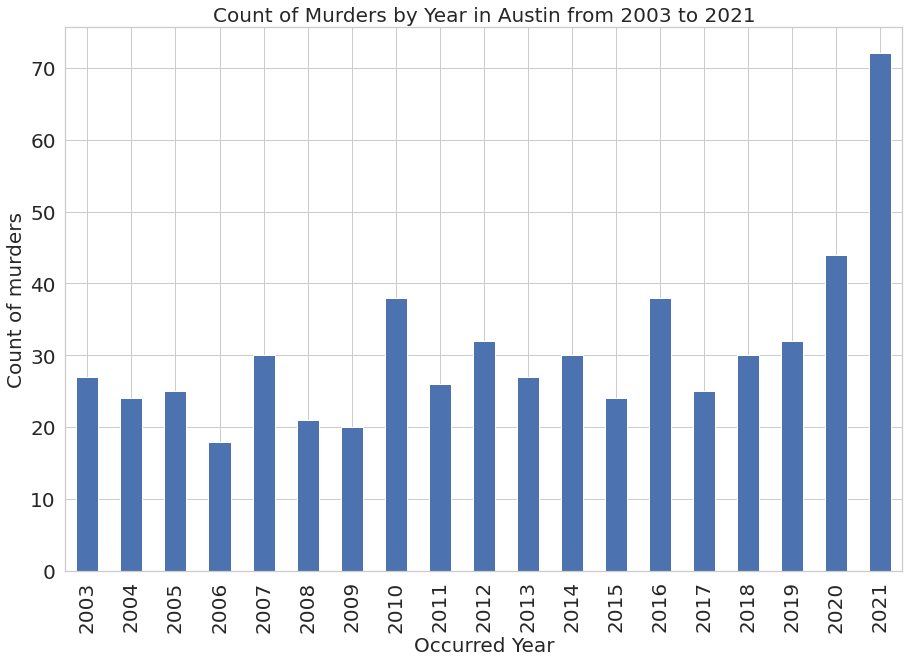

In [ ]:
murder_year_pivot_df = murder_df.pivot_table(index=['Occurred Year'], columns='Category Description', aggfunc='size', fill_value=0)
chart = murder_year_pivot_df.plot(kind='bar', figsize=(15, 10))
plt.ylabel('Count of murders')

ay = plt.subplot(chart, xlabel='Occurred Year', ylabel='Count of murders', title='')
ay.set_title('Count of Murders by Year in Austin from 2003 to 2021')
plt.xlabel('Occurred Year')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(20)

There is a massive spike in 2021! The above chart is corroborated by this story on KVUE: https://www.kvue.com/article/news/local/austin-homicide-record-number-2021/269-e3c419af-9722-456f-9b5d-c044944e128d.  
To look at that closely, let's make a new df with data on murders in 2021. 

In [ ]:
murder_2021_df = murder_df[murder_df['Occurred Year']==2021]

Let's look at 2021 murders in some detail by looking at which zip codes had the most:   

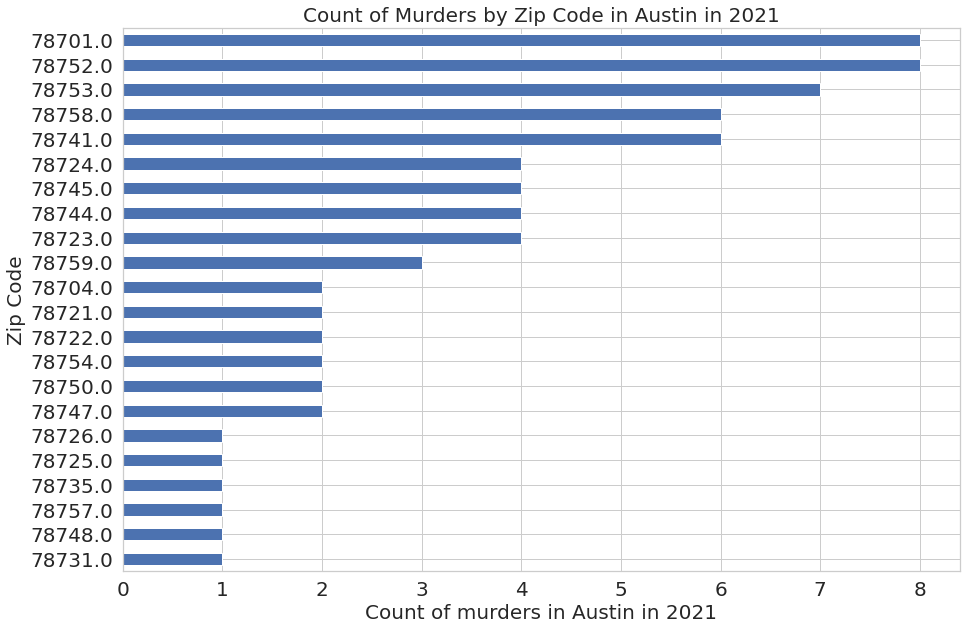

In [ ]:
murder_2021_df_zip_pivot = murder_2021_df.pivot_table(index=['Zip Code'], columns='Category Description', aggfunc='size', fill_value=0)
m = murder_2021_df_zip_pivot.sort_values('Murder', ascending=True)
chart = m.plot(kind='barh', figsize=(15, 10))
plt.xlabel('Count of murders')

ay = plt.subplot(chart, xlabel='Count of murders', ylabel='Zip Code', title='')
ay.set_title('Count of Murders by Zip Code in Austin in 2021')
plt.xlabel('Count of murders in Austin in 2021')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(20)

It looks like zip code 78701 has had the highest number of murders in 2021 in Austin. 
But are these murders random? Or are they family violence based?
Let's look at the relation between family violence and murders. 

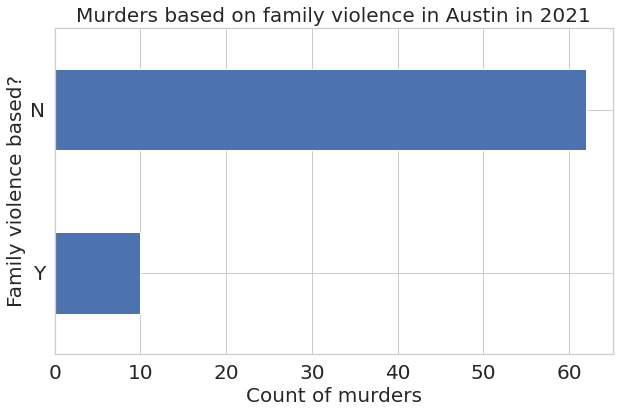

In [ ]:
#Let's plot family violence vs not family violece as a bar chart:
murder_2021_df_fv_pivot = murder_2021_df.pivot_table(index = ['Family Violence'], columns = 'Category Description', aggfunc='size', fill_value=0)
m = murder_2021_df_fv_pivot.sort_values('Murder', ascending=True)
chart = m.plot(kind='barh', figsize=(10,6))
plt.ylabel('Family violence based?')

ay = plt.subplot(chart, xlabel='Count of murders in 2021', ylabel='Family violence based?', title='')
ay.set_title('Murders based on family violence in Austin in 2021')
plt.xlabel('Count of murders')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(20)

It is clear that most muders were not related to family violence and therefore could be random. 
But did these murder happen indoors? Or outdoors? 
Let's look at the location type for the murders in 2021.

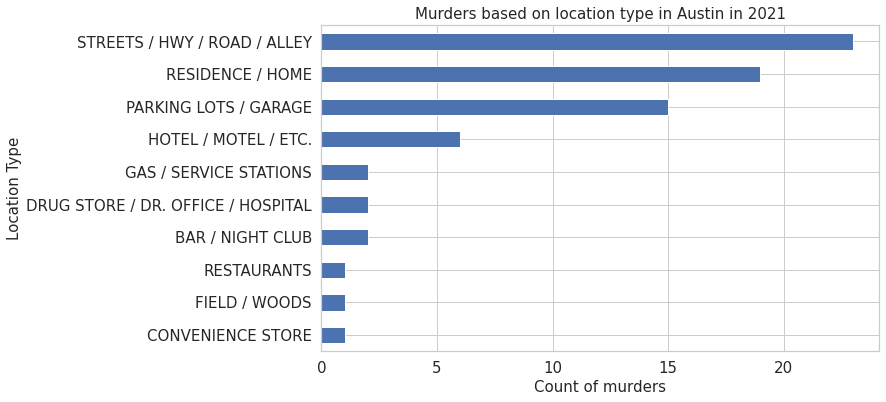

In [ ]:
murder_2021_df_lt_pivot = murder_2021_df.pivot_table(index = ['Location Type'], columns = 'Category Description', aggfunc='size', fill_value=0)
m = murder_2021_df_lt_pivot.sort_values('Murder', ascending=True)
chart = m.plot(kind='barh', figsize=(10,6))
plt.xlabel('Count of murders')

ay = plt.subplot(chart, xlabel='Count of murders', ylabel='Location Type', title='')
ay.set_title('Murders based on location type in Austin in 2021')
plt.xlabel('Count of murders')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(15)

It looks like most of the murders were outdoors and a significant number of them were at residences and parking lots. 

Let's plot a map for murders in 2021 with a sample of 20 rows of data. 

In [ ]:
#Out of the 65 murders, let's plot a sample of 20 murders of 2021 on the map
f = folium.Figure(width=800, height=700)
r = folium.Map(location=[30.265291020874546, -97.74944791477134], zoom_start=11).add_to(f)
for i in murder_2021_df.index[:20]:
  folium.Marker(location=[murder_2021_df['Latitude'][i], murder_2021_df['Longitude'][i]],
                tooltip=[murder_2021_df['Occurred Date'][i], murder_2021_df['Zip Code'][i]],
                popup = murder_2021_df['Location Type'][i], icon=folium.Icon(color="red")).add_to(r)
r

#### 4.3.2 Aggravated Assualts crime analysis in Austin

Let's check the trend by year.

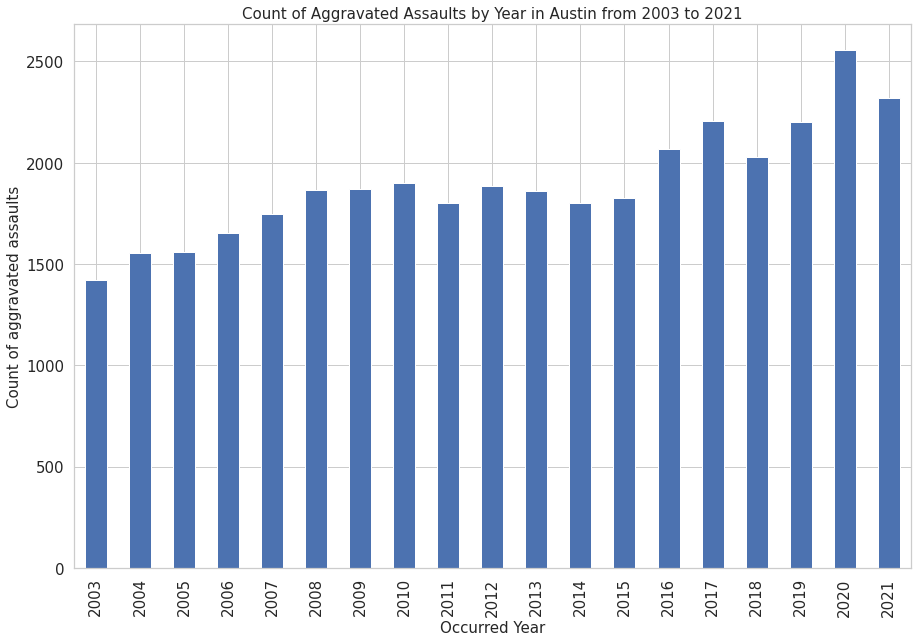

In [ ]:
agg_aslt_year_pivot_df = agg_aslt_df.pivot_table(index=['Occurred Year'], columns='Category Description', aggfunc='size', fill_value=0)
chart = agg_aslt_year_pivot_df.plot(kind='bar', figsize=(15, 10))
plt.ylabel('Count of aggravated assaults')

ay = plt.subplot(chart, xlabel='Occurred Year', ylabel='Count of Aggravated Assaults', title='')
ay.set_title('Count of Aggravated Assaults by Year in Austin from 2003 to 2021')
plt.xlabel('Occurred Year')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(15)

It looks like aggravated assault has mostly risen over the years and had a spike in 2020.

Because we have 65 zip codes in this dataset, let's look at the top 10 zipcodes for aggravated assault:

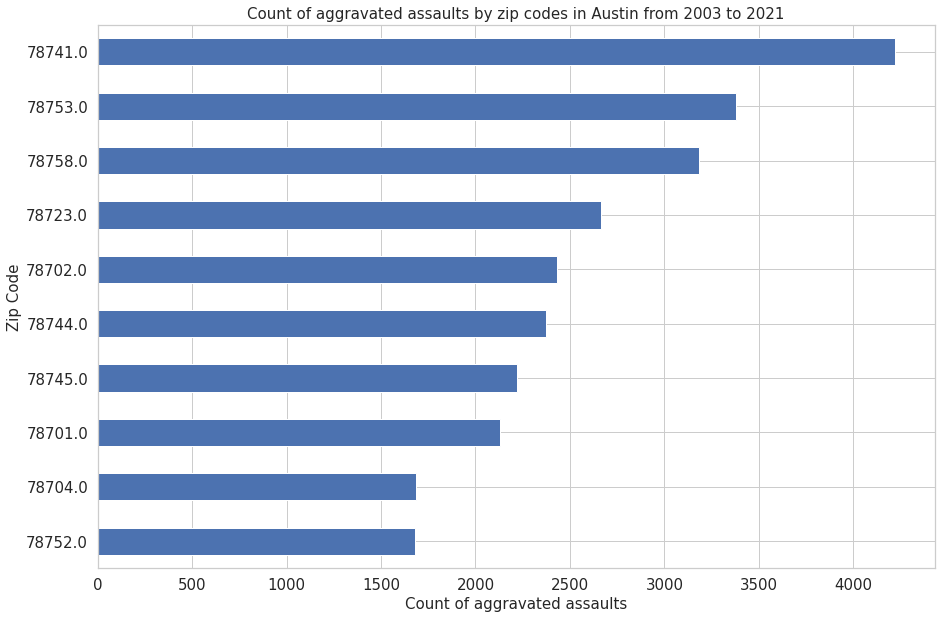

In [ ]:
agg_aslt_zip_pivot_df = agg_aslt_df.pivot_table(index=['Zip Code'], columns='Category Description', aggfunc='size', fill_value=0).sort_values('Aggravated Assault', ascending=True).iloc[-10:]
chart = agg_aslt_zip_pivot_df.plot(kind='barh', figsize=(15, 10))
plt.xlabel('Count of aggravated assaults')


ay = plt.subplot(chart, xlabel='Count of aggravated assault', ylabel='Zip Code', title='')
ay.set_title('Count of aggravated assaults by zip codes in Austin from 2003 to 2021')
plt.xlabel('Count of aggravated assaults')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(15)

It appears that 78741 is the highest for aggravated assaults in Austin from 2003 to 2021.

Let's look at the location type analysis for aggravated assault:

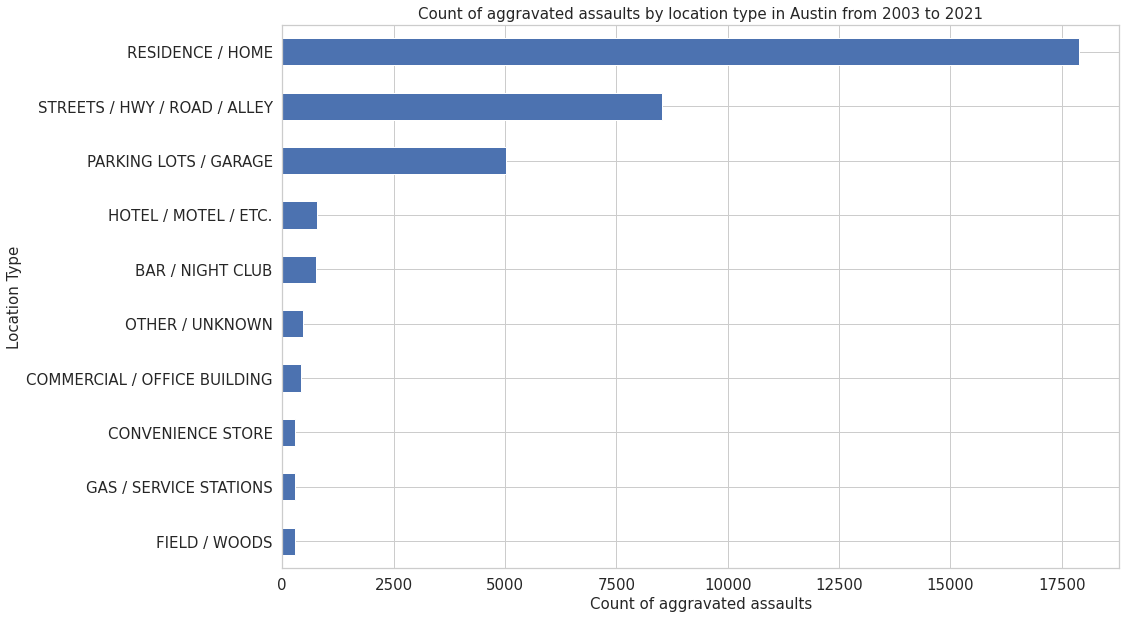

In [ ]:
agg_aslt_lt_pivot_df = agg_aslt_df.pivot_table(index=['Location Type'], columns='Category Description', aggfunc='size', fill_value=0).sort_values('Aggravated Assault', ascending=True).iloc[-10:]
chart = agg_aslt_lt_pivot_df.plot(kind='barh', figsize=(15, 10))
plt.xlabel('Count of aggravated assaults')


ay = plt.subplot(chart, xlabel='Count of aggravated assault', ylabel='Location Type', title='')
ay.set_title('Count of aggravated assaults by location type in Austin from 2003 to 2021')
plt.xlabel('Count of aggravated assaults')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(15)

It looks like most aggravated assaults are at home and about half that number occurred on streets/alleys. This is somewhat in contradiction to the 2021 murder trend. 

Let's look whether the aggravated assaults were linked to family violence or not.

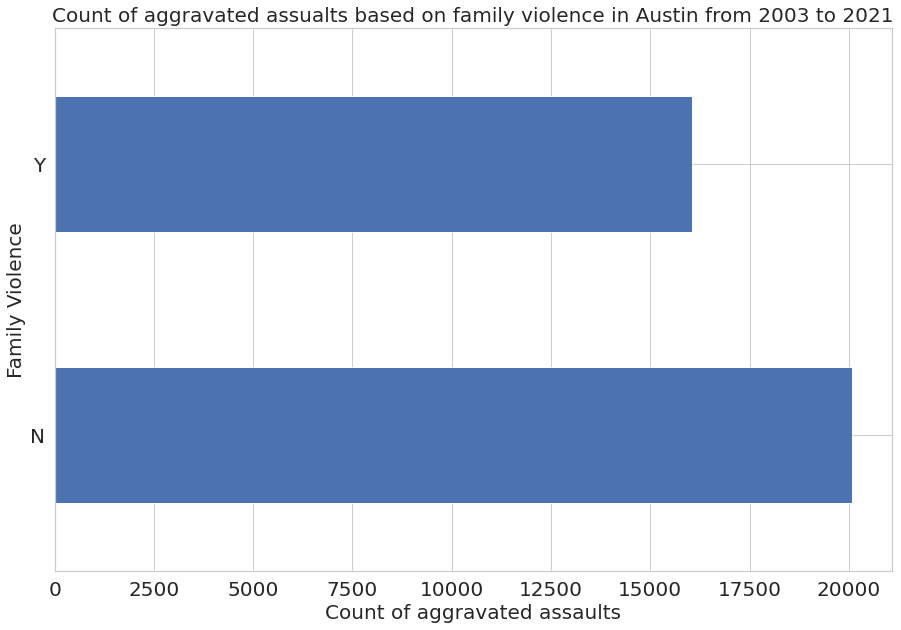

In [ ]:
aggaslt_fv_pivot_df = agg_aslt_df.pivot_table(index=['Family Violence'], columns='Category Description', aggfunc='size', fill_value=0).sort_values('Aggravated Assault', ascending=False).iloc[:10]
chart = aggaslt_fv_pivot_df.plot(kind='barh', figsize=(15, 10))
plt.xlabel('Count of aggravated assaults')

ay = plt.subplot(chart, xlabel='Count of aggravated assaults', ylabel='Family Violence', title='')
ay.set_title('Count of aggravated assualts based on family violence in Austin from 2003 to 2021')
plt.xlabel('Count of aggravated assaults')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(20)

There isn't much difference between the family violence related and unrelated aggravated assaults. 

### 4.3.3 Thefts analysis in Austin

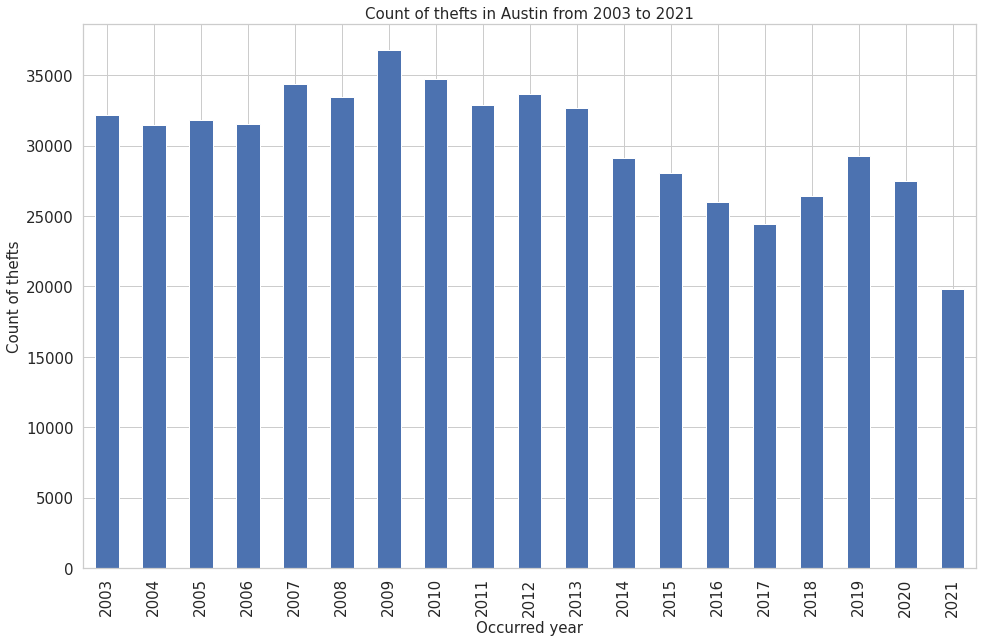

In [ ]:
#let's use the theft_df dataframe created at the beginning of the analysis based on crim category in this project.
theft_year_pivot_df = theft_df.pivot_table(index=['Occurred Year'], columns=['Category Description'], aggfunc='size', fill_value=0)
chart = theft_year_pivot_df.plot(kind='bar', figsize=(16, 10))
plt.ylabel('Count of thefts')

ay = plt.subplot(chart, xlabel='Occurred Year', ylabel='Count of thefts', title='')
ay.set_title('Count of thefts in Austin from 2003 to 2021')
plt.xlabel('Occurred year')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(15)

That's encouraging to see that the number of reported thefts are on a downward trend. Because 2021 is not over yet, it could be low. It would be interesting to see if 2021 remains low, or would it increase because people travel around for the holiday season.

Let's see which zip codes had the most thefts in the dataset:

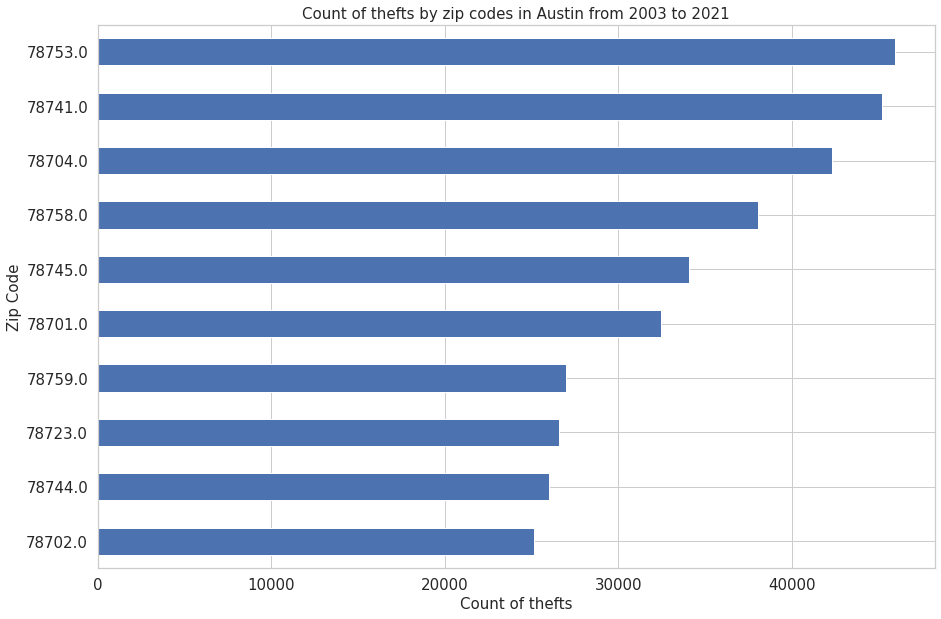

In [ ]:
theft_zip_pivot_df = theft_df.pivot_table(index=['Zip Code'], columns='Category Description', aggfunc='size', fill_value=0).sort_values('Theft', ascending=True).iloc[-10:]
chart = theft_zip_pivot_df.plot(kind='barh', figsize=(15, 10))
plt.xlabel('Count of thefts')

ay = plt.subplot(chart, xlabel='Count of thefts', ylabel='Zip Code', title='')
ay.set_title('Count of thefts by zip codes in Austin from 2003 to 2021')
plt.xlabel('Count of thefts')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(15)

It looks like 78753 is the zip code leading in thefts. OMG I used to live close to that zipcode, but never had a theft thankfully!

Let's look at thefts based on location types:

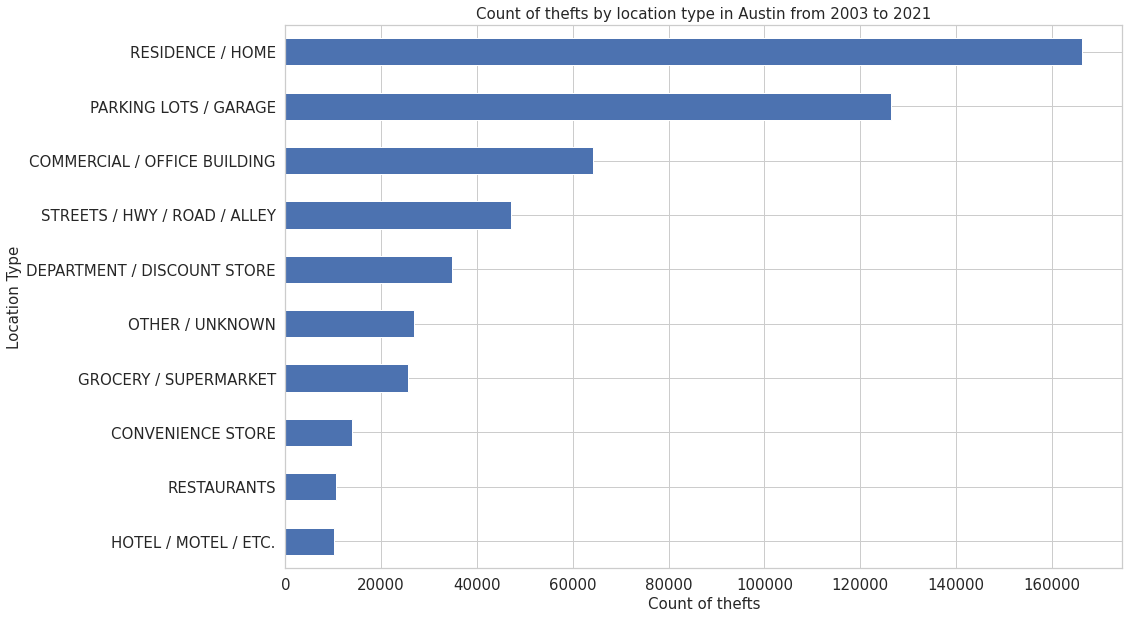

In [ ]:
theft_lt_pivot_df = theft_df.pivot_table(index=['Location Type'], columns='Category Description', aggfunc='size', fill_value=0).sort_values('Theft', ascending=True).iloc[-10:]
chart = theft_lt_pivot_df.plot(kind='barh', figsize=(15, 10))
plt.xlabel('Count of thefts')

ay = plt.subplot(chart, xlabel='Count of thefts', ylabel='Location type', title='')
ay.set_title('Count of thefts by location type in Austin from 2003 to 2021')
plt.xlabel('Count of thefts')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(15)

It would be interesting to see thefts by month.

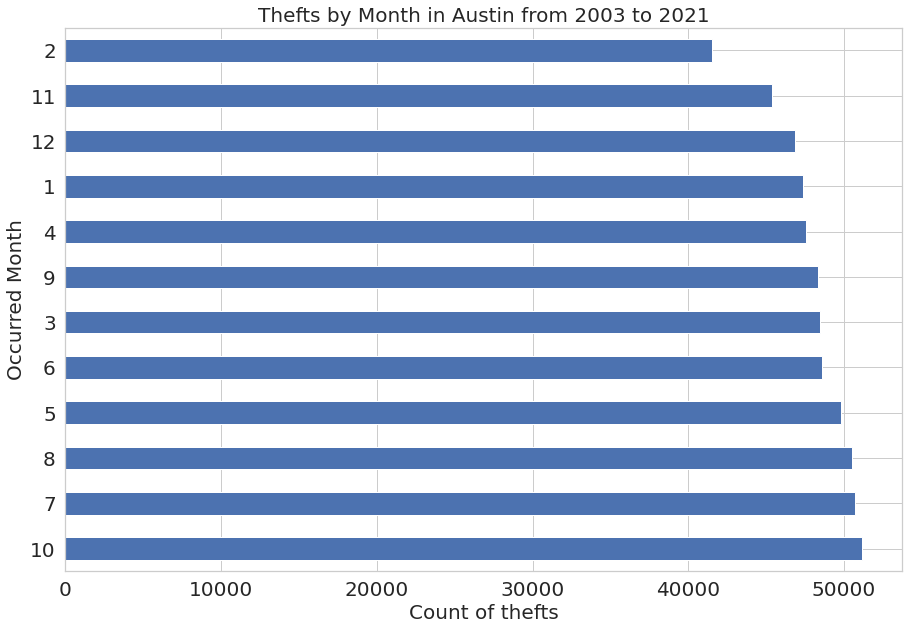

In [ ]:
theft_month_pivot_df = theft_df.pivot_table(index=['Occurred Month'], columns='Category Description', aggfunc='size', fill_value=0).sort_values('Theft', ascending=False)
chart = theft_month_pivot_df.plot(kind='barh', figsize=(15, 10))

ay = plt.subplot(chart, xlabel='Count of thefts', ylabel='Occurred Month', title='Count of thefts by month')
ay.set_title('Thefts by Month in Austin from 2003 to 2021')
plt.xlabel('Count of thefts')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(20)

It looks like February has the lowest thefts and October has the highest, per the data in the dataset. 

Let's look at thefts based on time of day in Austin.

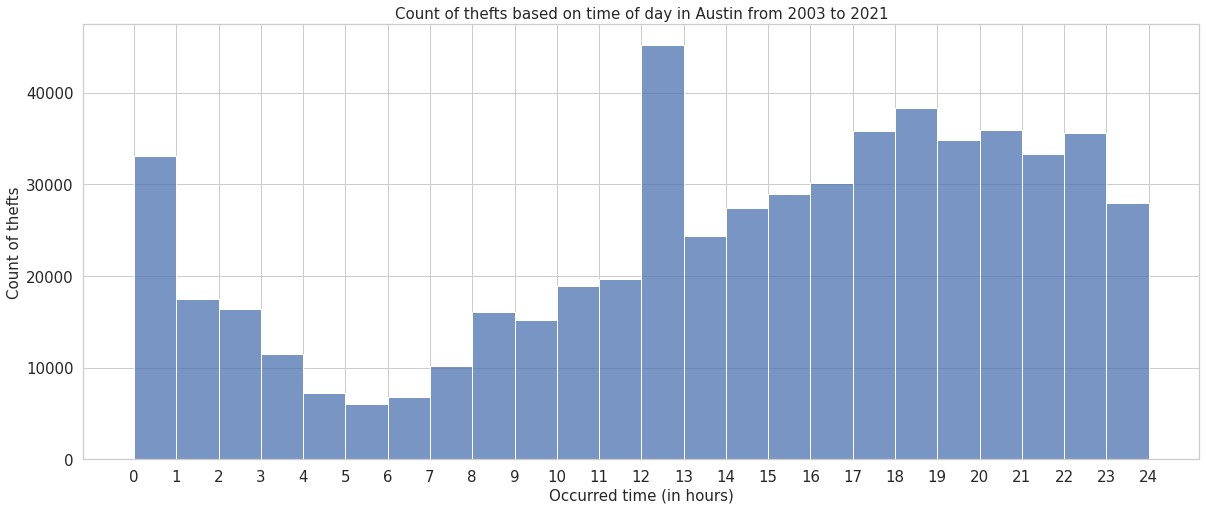

In [ ]:
plt.figure(figsize=(20, 8))
chart = sns.histplot(theft_df['Occurred Time']//100, bins=24)
plt.xticks(range(0, 25))
plt.xlabel('Occurred time (in hours)')
plt.ylabel('Count of thefts')
sns.set_theme(style='whitegrid')

ay = plt.subplot(chart, xlabel='Occurred time (in hours)', ylabel='Count of thefts', title='')
ay.set_title('Count of thefts based on time of day in Austin from 2003 to 2021')
plt.xlabel('Occurred time (in hours)')

for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(15)


It looks like thefts are at the lowest at 5am - 6am and rise through out the day. Because this chart also has an abnormally high peak at 12pm to 1pm, the data at that time seems suspect and will need to be analyzed in the future.

Let's analyze auto thefts. 

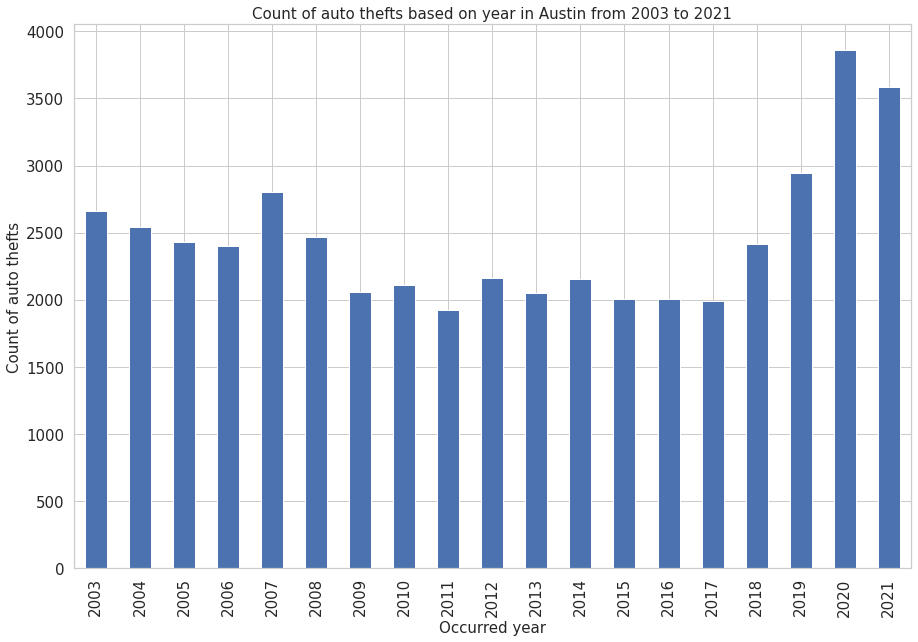

In [ ]:
auto_theft_year_pivot_df = auto_theft_df.pivot_table(index=['Occurred Year'], columns='Category Description', aggfunc='size', fill_value=0)
chart = auto_theft_year_pivot_df.plot(kind='bar', figsize=(15, 10))
plt.ylabel('Count of auto thefts')

sns.set_theme(style='whitegrid')

ay = plt.subplot(chart, xlabel='Occurred year', ylabel='Count of auto thefts', title='')
ay.set_title('Count of auto thefts based on year in Austin from 2003 to 2021')
plt.xlabel('Occurred year')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(15)


Looks like auto thefts have spiked up in 2020 and 2021 is catching up to 2020 levels as well. 

Let's look at top 10 zip codes for auto thefts in the dataset.

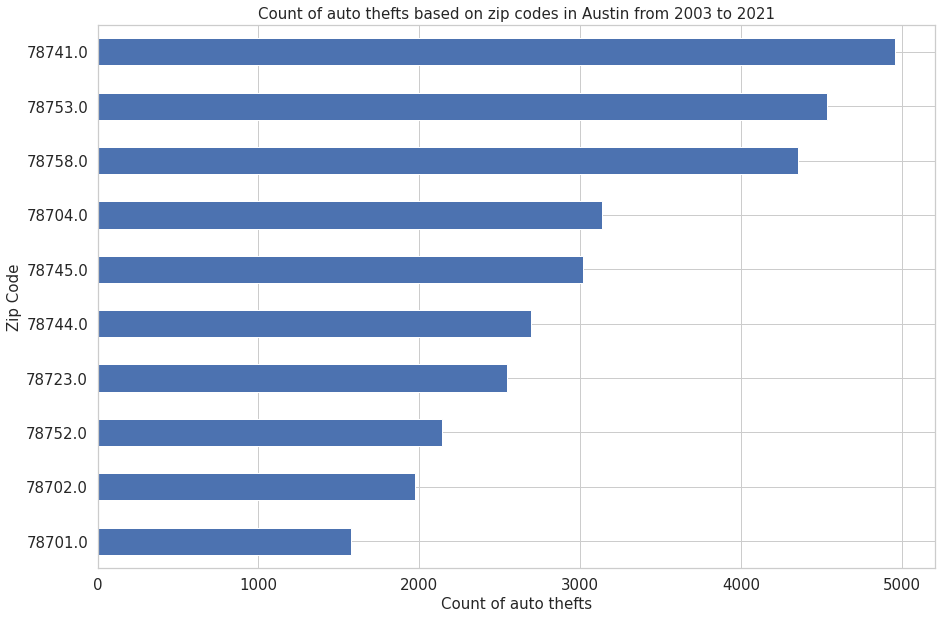

In [ ]:
auto_theft_zip_pivot_df = auto_theft_df.pivot_table(index=['Zip Code'], columns='Category Description', aggfunc='size', fill_value=0).sort_values('Auto Theft', ascending=True).iloc[-10:]
chart = auto_theft_zip_pivot_df.plot(kind='barh', figsize=(15, 10))
plt.xlabel('Count of auto thefts')

sns.set_theme(style='whitegrid')

ay = plt.subplot(chart, xlabel='Count of auto thefts', ylabel='Zip Code', title='')
ay.set_title('Count of auto thefts based on zip codes in Austin from 2003 to 2021')
plt.xlabel('Count of auto thefts')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(15)

Let's look at auto thefts by location type.

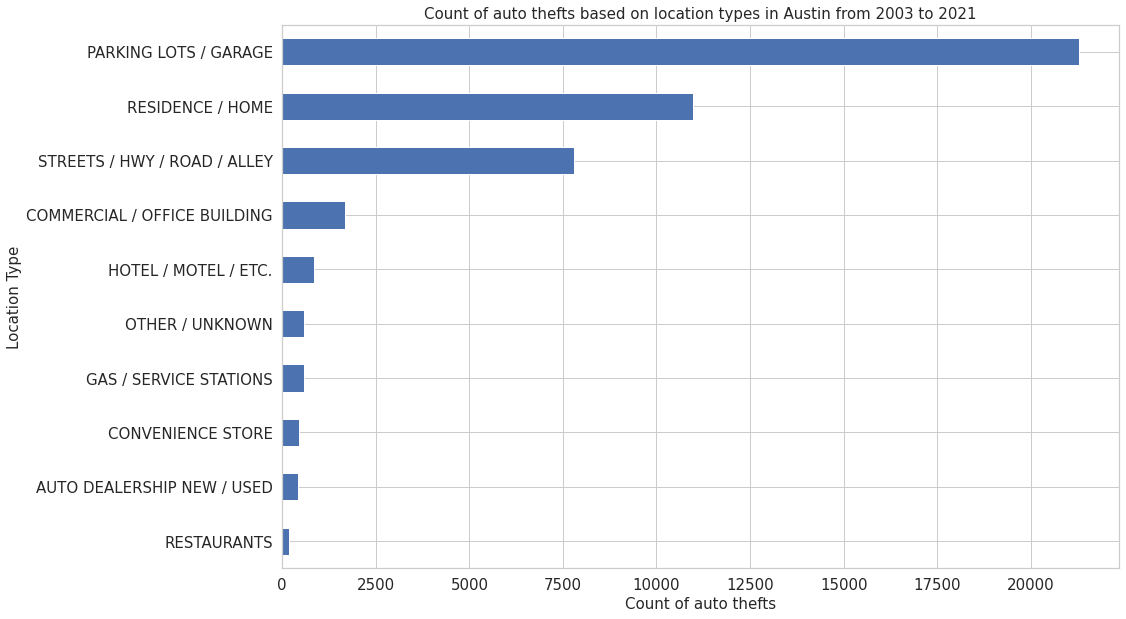

In [ ]:
auto_theft_lt_pivot_df = auto_theft_df.pivot_table(index=['Location Type'], columns='Category Description', aggfunc='size', fill_value=0).sort_values('Auto Theft', ascending=True).iloc[-10:]
chart = auto_theft_lt_pivot_df.plot(kind='barh', figsize=(15, 10))
plt.xlabel('Count of auto thefts')

sns.set_theme(style='whitegrid')

ay = plt.subplot(chart, xlabel='Count of auto thefts', ylabel='Location type', title='')
ay.set_title('Count of auto thefts based on location types in Austin from 2003 to 2021')
plt.xlabel('Count of auto thefts')
ay.get_legend().remove()
for item in ([ay.title, ay.xaxis.label, ay.yaxis.label] +
             ay.get_xticklabels() + ay.get_yticklabels()):
    item.set_fontsize(15)

It is quite evident that most autothedts occur in parking lots / garage where security is usually lax. The next most common location type is residences, possibly where vehicles are parked outdoors.

## Ask and answer questions

### Time based questions:
1. What time of day are most number of crimes occurring?

It appears that crime rates are the lowest at about 5am and go up from there - till midnight, and then start to fall back to 5am levels. There is a spike however at about 12pm.

2. What day of the week are most number of crimes occurring?

Tuesdays highest, Saturdays lowest

3. Which month of the year were the most an least number crimes recorded?

It is largely same across all months, although June had the highest and October had the lowest. 

4. How is the annual trend of crimes lookin?

No big changes in overall crimes; a dip in 2021 though (probably coz full year didnt complete yet); although 2021 has the highest # of murders so far

### Location based:
5. Which zip code has the highest number of crimes recorded? 

78741
  
6. What area of the map of Austin has the highest crime density? 

From the heat map, it looks like downtown Austin has the most crime density.

7. Which property type has the highest crimes recorded? 

Outdoors were the highest - streets / highway / alleys.

### Crime category based:
8. Which category of crimes is the highest number? 

Thefts are the highest

9. What does the murder trend look like? 

There is a big spike (almost 2x) in 2021, compared to previous years.

10. Were the murders  in 2021 family violence related? 

Largely no. 

11. Which zipcode had the highest number of murders in 2021?

78701 and 78752

12. What location type had the highest number of murders?

Streets / alleys

13. Which year had the highest aggravated asssaults?

2020, although 2021 is catching up

14. Were the aggravated assaults family violence related?

Mostly no; although they are close.

15. Which zip code had the highest aggravated assaults? 

78741

16. Which location type had the highest aggravated assaults? 

Home based locations

17. Which year had the highest number of thefts recorded?

2009; trend is decreasing till 2021

18. Which zip code has the highest number of thefts?

78753

19. WHich month has the highest average number of thefts recorded?

October; lowest was February

20. What time of day did the most thefts happen? 

12pm, but the data seems suspect and needs to be analyzed further.

21. Where were the most auto thefts happening? 

Most likely public parking lots, but parking lots for sure.

22. Which year has the highest auto thefts? 

2020, although 2021 is catching up

23. Which zip code has the higest number of auto thefts?

78741



In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...


[jovian] Error: jovian.commit doesn't work on Colab unless the notebook was created and executed from Jovian.
Make sure to run the first code cell at the top after executing from Jovian.
Alternatively, you can download this notebook and upload it manually to Jovian.
Learn more: https://jovian.ai/docs/user-guide/run.html#run-on-colab


## Summary and Conclusion
- Overall, it appears that 78741 is the most unsafe zip code. But this needs to be taken with a grain of salt because other zip codes might not have been populated as much unitl later years. This can only be confirmed based on population size of all Austin zip codes based on years, given that Austin is one of the most rapidly expanding cities in the US.

- The scale of crimes makes me appreciate the level of work that the Austin Police Department has to do in order to keep the crime statistics low. The police department needs to be strnegthened with more manpower and resources to keep crimes in check, with the increased population and investments in town. 

- I hope this analysis is helpful to the people of Austin and rest of the US, in helping them make decisions on safer 

## Future Work:
- Scrape https://www.zipdatamaps.com/zipcodes-austin-tx and superimpose crime and population data from here
- Plot crime map chloropleths using zip code geojson data
- Expand analysis to other metro cities of the US and the world

## References:
- Extract year from date&time column: https://datascienceparichay.com/article/pandas-extract-year-from-datetime-column/
- Ensure axis labels show up on plots made with matplotlib: https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html
- Remove legend from plots made by matplotlib: https://www.delftstack.com/howto/matplotlib/how-to-remove-legend-from-a-figure-in-matplotlib/
- Change all font sizes on plots made by matplotlib: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
- Convert number to time: https://stackoverflow.com/questions/30070548/convert-number-to-time-in-python
- Write pandas df to csv: https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
- Violin plot visualization: http://www.sthda.com/english/wiki/ggplot2-violin-plot-easy-function-for-data-visualization-using-ggplot2-and-r-software
- Create histogram with string counts using pandas: https://stackoverflow.com/questions/29525120/pandas-creating-a-histogram-from-string-counts
- Change figure size for seaborn plot: https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
- Pandas pivot tables: https://pandas.pydata.org/docs/reference/api/pandas.pivot.html
- Adding value lables to charts: https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib-bar-chart
- Axis labels on seaborn plot: https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot
- Change figure size of seaborn plot: https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot
- Seaborn violin plots: https://seaborn.pydata.org/generated/seaborn.violinplot.html
- EDA case study example on Jovian: https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/exploratory-data-analysis-case-study
- Crafting great visualizations - by Jovian: https://jovian.ai/learn/zero-to-data-analyst-bootcamp/knowledge/crafting-great-visualizations-17

In [3]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/tejasvi-sadasivuni/eda-project-tejasvi-sadasivuni


'https://jovian.ai/tejasvi-sadasivuni/eda-project-tejasvi-sadasivuni'